## Final Project Submission

Please fill out:
* Student name: LESLEY WANJIKU KAMAMO
* Student pace: PART TIME
* Scheduled project review date/time: 24TH JULY 2023
* Instructor name: STELLA WAITHERA
* Blog post URL:


## Overview

This project requires the use Explanatory Data Analyisis to generate insights
for Microsoft as our business stakeholder.
Microsoft sees all the big companies creating original video content and they want 
to get in on the fun. They have decided to create a 'new movie studio', but they don’t 
know anything about creating movies.

We'll be required to import, clean, combine, reshape and visualize the data provided to answer the questions and provide insights or recommendation to the Stakeholders.


## Business Problem
This business has decided to create a New Movie Studio. To do this, they need insight into the following:
1. What studios are frequently used for production
2. What is the best type of films to create
3. What genres of films are being viewed frequently
4. What genres of films are bring the most return profit

### Business Understanding
The business questions provided in this project are:
1. What type of films are currently doing the best at the Box Office
2. Transalate the findings of [1] to actionable insights that the the head of Microsoft's new movie studio can use to help decide what type of films to create



## Data Understanding

For this project, we will use the data under the file path `zippedData/...`. These files contain information about movies. They represent historical data on movies for recent past years, hence this data will be modified for the purpose of the analysis.

The data is contained in three separate CSV files:
1. `bom.movie_gross.csv`: each record represents movie title, with attributes of that movie (e.g. year). The domestic_gross and foreign_gross are represented and each movie listed has a corresponding studio of creation.
2. `title.ratings.csv`: each record represents a movie title, then the Genre and Start year columns with values on the same.
2. `title.basics.csv`: each record represents a movie, with additional columns such as the average ratings


The features of interest for this analysis will be:
`movie_title`: The title (or AKA) of the Movie
`movie_rating`: The rating of the movie
`movie_type`: The genre of the movie

The data from this files as seen above represents various column findings. Such kind of findings will be available for the analyisis and insights into what to recommend to the Businees Stakeholders.


### Setup

In the cell below, we will:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [114]:
#import all standard packages to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### 1. Load the dataset from the csv files using Pandas

In the below cell,
##### Open Up the CSV files as a Dataframe

1. Load the dataset in `bom.movie_gross.csv` as `movies_df`
2. Load the data from the other two csv files:
               `title.basics.csv` as `basic_df`
               `title.rating.csv` as `rating_df`

   
We'll use `index_col=0` when opening the CSV because the index contains important information.

In [115]:
# load `bom.movie_gross.csv` as `movies_df`
movies_df = pd.read_csv('zippedData/bom.movie_gross.csv', index_col=0)

movies_df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [116]:
basics_df = pd.read_csv('zippedData/title.basics.csv', index_col=0)

basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [117]:
ratings_df = pd.read_csv('zippedData/title.ratings.csv', index_col=0)

ratings_df

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [118]:

# more info on the movies_df dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [119]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [120]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


## Data Preparation

For this procedure, we are required to determine the rows with missing values and choose the appropriate methods to deal with such outliers, for analysis purposes.


### Data Cleaning
##### 1.1 Identify and Handling missing values

As we can see from the `movie_df` dataset, the columns with missing values include:
1. `studio`
2. `domestic_gross`
3. `foreign_gross`



In [121]:
missing_studio_sample = movies_df[movies_df[["studio", "domestic_gross", "foreign_gross"]].isna()].sample(
    5, random_state=1
)
missing_studio_sample

,studio,domestic_gross,foreign_gross,year
title,,,,
Ladrones,NaN,NaN,NaN,NaN
The Lady in the Car with Glasses and a Gun,NaN,NaN,NaN,NaN
Southside with You,NaN,NaN,NaN,NaN
Fun Size,NaN,NaN,NaN,NaN
Batti Gul Meter Chalu,NaN,NaN,NaN,NaN


##### 2. Dropping the missing values

From the data above, The Studio column is the most relevant column for this model,
Hence, missing values present in the studio column need to be dropped.
There's no default value for studio hence replacing the missing values with any other studio name,
is not sensible.

In [122]:
movies_df.dropna(subset=["studio"], inplace=True)

movies_df["studio"].isna().sum()

0

#### 3. Identifying and Handling text data

This involves identifying the minor issues and correcting them brought about by
the overall natural language processing. Here we';; be using the studio column as our base

In [123]:
movies_df["studio"].value_counts()

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
        ... 
CLF        1
FInd.      1
KKM        1
Truly      1
SMod       1
Name: studio, Length: 257, dtype: int64

##### 2.1 Identify and Handling missing values

As we can see from the `basics_df` dataset, the columns with missing values include:
1. `original_title`
2. `runtime_minutes`
3. `genres`


In [124]:
missing_genre_sample = basics_df[basics_df[[ "genres"]].isna()].sample(
    5, random_state=1
)
missing_genre_sample

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt2892012,NaN,NaN,NaN,NaN,NaN
tt2157680,NaN,NaN,NaN,NaN,NaN
tt7159010,NaN,NaN,NaN,NaN,NaN
tt6315088,NaN,NaN,NaN,NaN,NaN
tt7812438,NaN,NaN,NaN,NaN,NaN


In [125]:
# Drop all rows with missing values for the genres column
basics_df.dropna(subset=["genres", "runtime_minutes"], inplace=True)

basics_df["genres"].isna().sum()

0

#### 2.3 Identifying and Handling text data

This involves identifying the minor issues and correcting them brought about by
the overall natural language processing. Here we'll be using the genre column as our base

In [126]:
basics_df['genres'].value_counts()

Documentary                   24672
Drama                         15725
Comedy                         6413
Comedy,Drama                   3163
Horror                         2975
                              ...  
Crime,Family,Thriller             1
Action,Documentary,Western        1
Action,Thriller,Western           1
Biography,Family,Sport            1
Adventure,History,Sci-Fi          1
Name: genres, Length: 1040, dtype: int64

* Values for the genres are sensible enough for data modelling *

##### 3.1 Identify and Handling missing values

As we can see from the `ratings_df` dataset, all columns are without missing values.

 ## Joining Dataframes together
 
 * We will need to combine the two title csv files into one, to have a consolidated dataset to analysis through.

Instanstiate a variable `data_files` to save the file path of `title.basics.csv` and `title.ratings.csv` csv files.

Since both CSV files have a common column-header, `tconst`, we'll concat the two CSV files. We will do this by using the `pd.concat` function for the two data sets. After which we will read the csv file using the `pd.read_csv` function.


In [127]:
# load the other two csv files as `info_df`
data_files = ["zippedData/title.basics.csv", "zippedData/title.ratings.csv"]
info_df = pd.concat(pd.read_csv(files) for files in data_files)

info_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN
...,...,...,...,...,...,...,...,...
73851,tt9805820,NaN,NaN,NaN,NaN,NaN,8.1,25.0
73852,tt9844256,NaN,NaN,NaN,NaN,NaN,7.5,24.0
73853,tt9851050,NaN,NaN,NaN,NaN,NaN,4.7,14.0
73854,tt9886934,NaN,NaN,NaN,NaN,NaN,7.0,5.0


* We are able to join this two tables by the use of the .merge() function since we have a common column for both.
ie tconst column

* We'll use the Inner join so as to find matching or only values common to both tables

In the cell below, we have created a new dataframe called `basics_and_ratings_df` that contains the joined data.

In [128]:
basics_and_ratings_df = basics_df.merge(ratings_df, on="tconst",how='inner')
basics_and_ratings_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6


In [148]:
value_counts = basics_and_ratings_df["runtime_minutes"].value_counts()
value_counts

90.0     4718
80.0     2142
85.0     2048
100.0    1954
95.0     1919
         ... 
212.0       1
278.0       1
225.0       1
467.0       1
746.0       1
Name: runtime_minutes, Length: 289, dtype: int64

Group data by genre - model in graph top genres
Rating -  highest rating movie genre seaborn plot
Relate the rating and runtime_minutes

Year and genre produced - scatter plat

## Data Modelling

This process is used to interate through the data and create models based on the questions we seek to answer.
The choice of data and models to use is appropriate for insights to be provided for the stakeholders Business problem.
Through this choices we are able to make recommendations to the stakeholders Business problem.


#### 1. This is to answer the question on *What is the distribution of the movies by studio?*

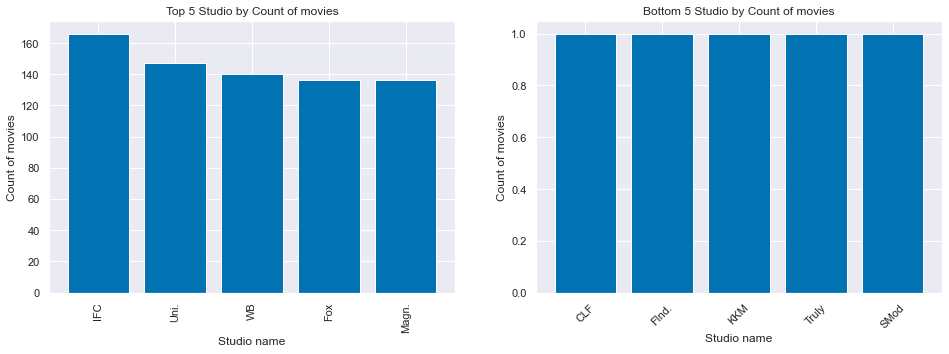

In [145]:
# plot graphs/models for the above dataset

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = movies_df["studio"].value_counts()
top_5_counts = value_counts.iloc[:5]
bottom_5_counts = value_counts.iloc[-5:]

# Plot data
ax1.bar(top_5_counts.index, top_5_counts.values)
ax2.bar(bottom_5_counts.index, bottom_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_xlabel("Studio name")
ax2.set_xlabel("Studio name")
ax1.set_ylabel("Count of movies")
ax2.set_ylabel("Count of movies")
ax1.set_title("Top 5 Studio by Count of movies")
ax2.set_title("Bottom 5 Studio by Count of movies");


#### 2. To answer the question, *What genres of films are frequently viewed?*

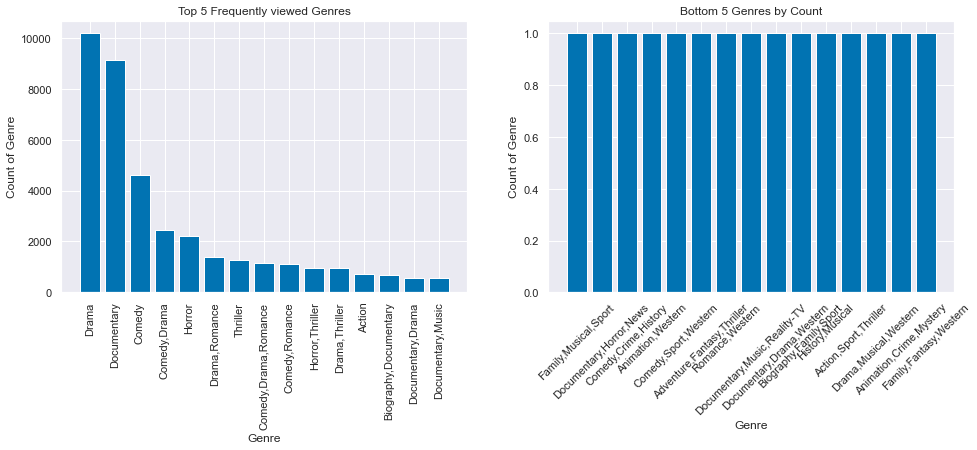

In [142]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
genre_counts = basics_and_ratings_df["genres"].value_counts()
top_5_genres = genre_counts.iloc[:15]
bottom_5_genres = genre_counts.iloc[-15:]

# Plot data
ax1.bar(top_5_genres.index, top_5_genres.values)
ax2.bar(bottom_5_genres.index, bottom_5_genres.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_xlabel("Genre")
ax2.set_xlabel("Genre")
ax1.set_ylabel("Count of Genre")
ax2.set_ylabel("Count of Genre")
ax1.set_title("Top 5 Frequently viewed Genres")
ax2.set_title("Bottom 5 Genres by Count");

In [131]:
# Results
"""
    The distribution above shows the Top 5 and Bottom 5 distributions of the movie genres.
    The frequently viewed types of film  is:
    1. Drama
    2. Documentary
    3. Comedy
    
    The least viewed types of films include:
    1. Biography, Fantasy
    2. Drama,Game-show, Thriller
    3. History, Western
    
    - It can be seen that for films with mixed genres types, they are likely to be viewed less.
"""

'\n    The distribution above shows the Top 5 and Bottom 5 distributions of the movie genres.\n    The frequently viewed types of film  is:\n    1. Drama\n    2. Documentary\n    3. Comedy\n    \n    The least viewed types of films include:\n    1. Biography, Fantasy\n    2. Drama,Game-show, Thriller\n    3. History, Western\n    \n    - It can be seen that for films with mixed genres types, they are likely to be viewed less.\n'

#### 3. To answer the question of *What is the distribution of the Genres over the years?*

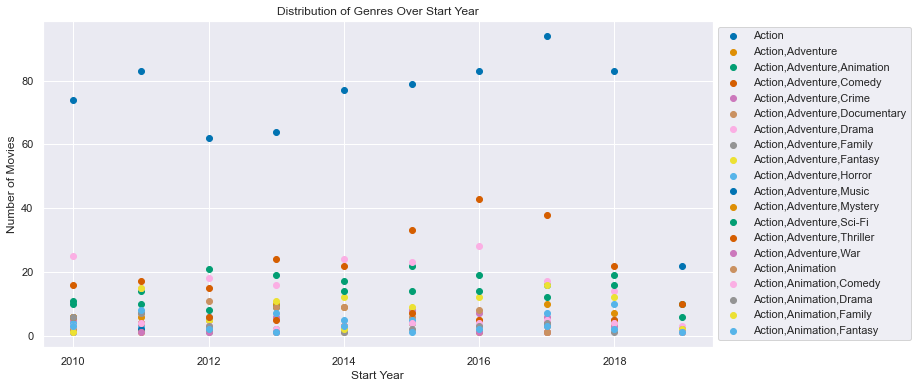

In [143]:
# scatter plot of the distribution of the genres over the years

# Group data by start year and genre, and calculate the count of movies in each year group
genre_counts_by_year = basics_and_ratings_df.groupby(['start_year', 'genres']).size().reset_index(name='count')

# Create a scatter plot of the same
fig, ax = plt.subplots(figsize=(12,6))

for genre in genre_counts_by_year['genres'][:20]:
    data = genre_counts_by_year[genre_counts_by_year['genres'] == genre]
    ax.scatter(data['start_year'], data['count'], label=genre)

# Customize the plot
ax.set_xlabel('Start Year')
ax.set_ylabel('Number of Movies')
ax.set_title('Distribution of Genres Over Start Year')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


In [133]:
# Results
"""

From the above graph, we can see that throughout the year, the number of movie productions for the 'Action' genre
is generally high.    Over the years, most movies produced have the 'Action' genre.
    
"""


"\n\nFrom the above graph, we can see that throughout the year, the number of movie productions for the 'Action' genre\nis generally high.    Over the years, most movies produced have the 'Action' genre.\n    \n"

#### 4. To answer the question of *What is the Rating of the Genres?*

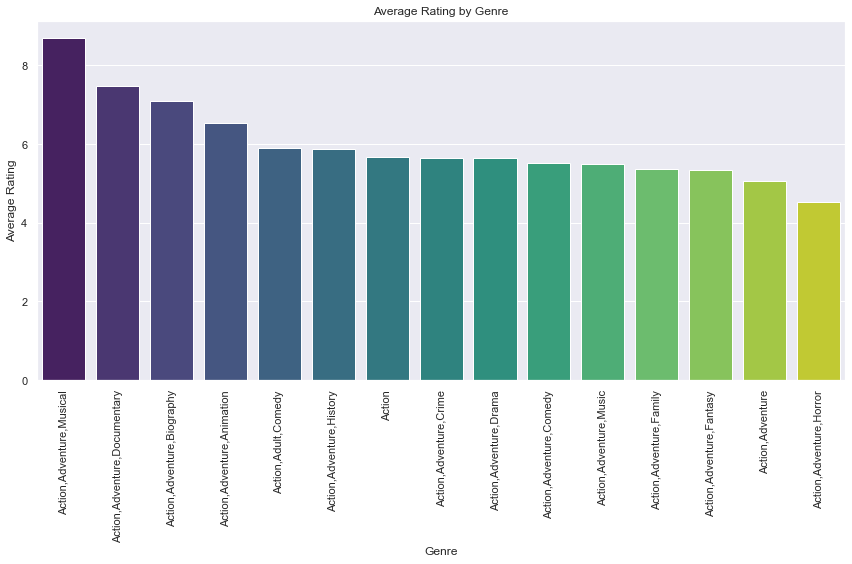

In [144]:
# Calculate the average rating for each genre
avg_rating_by_genre = basics_and_ratings_df.groupby('genres')['averagerating'].mean()[:15].reset_index()

# sort the ratings in from highest count
avg_rating_by_genre = avg_rating_by_genre.sort_values(by='averagerating', ascending=False)
# Create the bar plot

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x='genres', y='averagerating', data=avg_rating_by_genre, palette="viridis")
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

In [135]:
# Results

"""
From the above model, we are able to see that when comparing the Movie genres and their Ratings, 
viewers are inclined to watching Action-based genre films/ movies, giving the high rating received.

The genre ratings that was recorded the highest based on the dataset inlcude:
1. Action, Adventure,Musical genre
    """

'\nFrom the above model, we are able to see that when comparing the Movie genres and their Ratings, \nviewers are inclined to watching Action-based genre films/ movies, giving the high rating received.\n\nThe genre ratings that was recorded the highest based on the dataset inlcude:\n1. Action, Adventure,Musical genre\n    '

#### 5. To answer the question of *What is the distribution of the Domestic Gross Across the Years?*

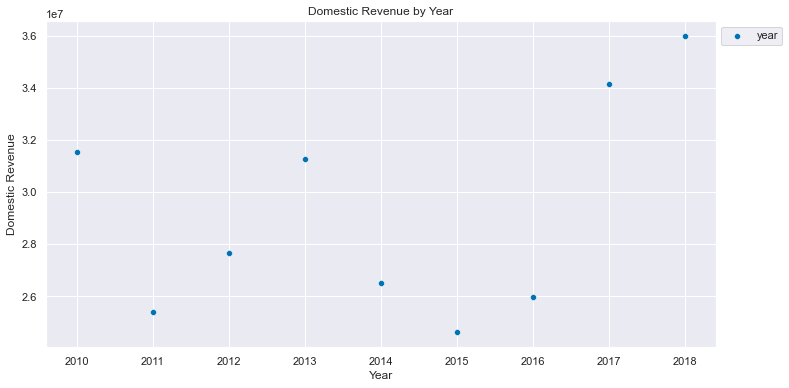

In [146]:
# Create the box plot for gross revenue by genre
fig, ax = plt.subplots( figsize=(12, 6))

# find dataset set that relates the year with domestic gross
avg_domestic_gross = movies_df.groupby('year')["domestic_gross"].mean().reset_index()
# print(avg_domestic_gross)

# sns.barplot(x='year', y='domestic_gross', data=avg_domestic_gross)
sns.scatterplot(x='year', y='domestic_gross', data=avg_domestic_gross)

ax.set_xlabel('Year')
ax.set_ylabel('Domestic Revenue')
ax.set_title('Domestic Revenue by Year')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),labels=[i for i in avg_domestic_gross])
sns.set( palette="colorblind")

In [137]:
# Results
"""
From the above graph, we can see that the Highest Domestic gross over the years was recorded in the Year 2018.
Form the `Distribution of Genre over Start year` graph, action-based genres of movies served as the highest
production for the year 2018.
Hence, we can conclude that an investment in the production of Action-based genres films would be of benefit to the stakeholder
"""

'\nFrom the above graph, we can see that the Highest Domestic gross over the years was recorded in the Year 2018.\nForm the `Distribution of Genre over Start year` graph, action-based genres of movies served as the highest\nproduction for the year 2018.\nHence, we can conclude that an investment in the production of Action-based genres films would be of benefit to the stakeholder\n'

#### 5. To answer the question of *What is the relation of movie runtime to the rating?*

           runtime_minutes  averagerating
tconst                                   
tt8273150          51420.0            5.0
tt2659636          14400.0            6.2
tt2008009           1440.0            8.9
tt8677246           1100.0            8.6
tt9047474            808.0            8.5
...                    ...            ...
tt7349926              4.0            9.4
tt5884852              4.0            4.3
tt2258391              3.0            6.2
tt7379378              3.0            7.8
tt4597838              3.0            6.7

[65720 rows x 2 columns]


Text(0.5, 1.0, 'Scatter Plot of Movie Runtime vs. Rating')

<Figure size 720x432 with 0 Axes>

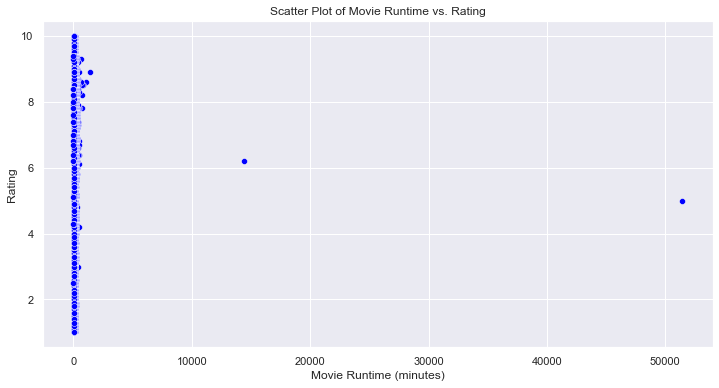

In [153]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(12,6))
runtime_df = basics_and_ratings_df[["runtime_minutes", "averagerating"]]
# print(max(runtime_df["runtime_minutes"]))
# maxrating = runtime_df.loc[runtime_df["runtime_minutes"] == max(runtime_df['runtime_minutes'])]
# print(maxrating)

sorted_ratings = runtime_df.sort_values(by="runtime_minutes", ascending=False)
print(sorted_ratings)
sns.scatterplot(x='runtime_minutes', y='averagerating', data=sorted_ratings, color='blue')
ax.set_xlabel('Movie Runtime (minutes)')
ax.set_ylabel('Rating')
ax.set_title('Scatter Plot of Movie Runtime vs. Rating')

# plt.tight_layout()
# plt.show()

In [154]:
# Results

"""
The above model is used to show the relation between the movie runtime and the rating
In general, it shows that the less the movie runtime, the more the rating it receives.
"""

'\nThe above model is used to show the relation between the movie runtime and the rating\nIn general, it shows that the less the movie runtime, the more the rating it receives.\n'

## Summary


#### Conclusion
The analysis done for the above dataset chosen yields the following conclusion.
1. The most preferred genre / type of films are the Action-based.
2. In the recent years, the most produced type of films are the Action-based Films
3. The year that returned the most domestic gross is 2018. We are able to relate this with the gemre of film produced that year - which represents the 'Action' based films.


#### Recommendation
From the analysis done above, I would recommend that the Stakeholders:
1. Should consider creating Action-based films
2. Should consider creating films with less runtime runtime in minutes. In doing so, this will yield to  higher ratings from viewers and in turn more revenue for the stakeholder.

#### Limitations of my findings
I agree that the analysis done above doesn't cover all the bases and is a start in solving the business problem, of which type of films should be created by the stakeholder.


To improve this project in the future, I would include more of the datasets provided in the zippedData folder, and provide relationships between the data somewhat recorded. This will in no doubt be useful in providing additional insights and recommendations to the stakeholder.

